In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# normal moode frequency and energy in cm-1
nm1 = [
    [21, 50.9],
    [67, 13.5],
    [84, 13.7],
    [134, 4.5],
    [214, 11.3],
    [253, 4.0],
    [340, 0.7],
    [416, 10.3],
    [450, 0.2],
    [535, 1.0],
    [624, 8.6],
    [631, 11.9],
    [659, 9.6],
    [718, 0.4],
    [767, 1.1],
    [782, 0.5],
    [859, 1.4],
    [910, 0.1],
    [924, 0.2],
    [964, 0.2],
    [973, 3.3],
    [990, 1.4],
    [1002, 28.5],
    [1019, 12.5],
    [1060, 1.4],
    [1069, 0.1],
    [1108, 0.2],
    [1205, 19.2],
    [1214, 6.8],
    [1321, 10.7],
    [1349, 121.7],
    [1354, 4.5],
    [1364, 16.3],
    [1480, 0.6],
    [1487, 1.8],
    [1534, 50.9],
    [1546, 12.6],
    [1594, 153.5],
    [1658, 1.7],
    [3178, 0.1],
    [3201, 0.6],
    [3203, 0.5],
    [3211, 0.6],
    [3245, 0.4],
]

In [3]:
# normal moode frequency and energy in cm-1
nm2 = [
    [25, 66.3],
    [68, 12.0],
    [81, 32.3],
    [132, 1.0],
    [215, 9.5],
    [250, 4.1],
    [339, 2.4],
    [412, 9.4],
    [443, 0.2],
    [529, 1.0],
    [626, 9.4],
    [630, 8.6],
    [665, 8.4],
    [683, 0.7],
    [719, 1.7],
    [769, 1.3],
    [793, 0.5],
    [859, 0.8],
    [915, 0.3],
    [932, 0.2],
    [974, 0.2],
    [994, 1.8],
    [1005, 3.2],
    [1011, 18.3],
    [1017, 14.3],
    [1060, 1.1],
    [1087, 1.0],
    [1113, 1.0],
    [1212, 28.5],
    [1217, 3.9],
    [1238, 1.6],
    [1321, 25.6],
    [1345, 109.6],
    [1364, 1.4],
    [1367, 38.7],
    [1440, 11.0],
    [1486, 3.9],
    [1534, 49.6],
    [1544, 21.7],
    [1599, 109.7],
    [1630, 0.1],
    [1653, 3.1],
    [3190, 0.1],
    [3221, 1.0],
    [3222, 0.6],
    [3257, 0.2],
]


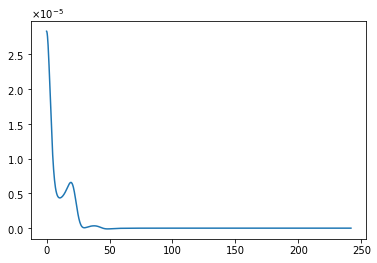

In [4]:
# temperature. kelvin to a.u.
T = 300  * 3.166e-6
# transfer integral. eV to a.u.
V = 102.4e-3 / 27.212

omega_cm = []
lam_cm = []
for omega, lam in nm1 + nm2:
    omega_cm.append(omega)
    lam_cm.append(lam)
omega_array = np.array(omega_cm) * 4.5563e-6
lam_array = np.array(lam_cm) * 4.5563e-6

omega_array = omega_array.reshape(-1, 1)
lam_array = np.array(lam_array).reshape(-1, 1)

g_array = np.sqrt(lam_array / omega_array)
t = np.linspace(0, 1e4, int(1e3)).reshape(1, -1)
n_array = 1 / (np.exp(omega_array / T) - 1)

onexp = (g_array ** 2) * (2 * n_array + 1) * (1-np.cos(omega_array * t))
onexp = onexp.sum(0)

integrand = 2 * V**2 * np.exp(-onexp) * np.cos( ((g_array ** 2) * np.sin(omega_array * t)).sum(0) )
t_in_fs = t.ravel() * 2.418e-17 * 1e15 
plt.plot(t_in_fs, integrand)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0, 0), useMathText=True)